# Tasca M5 T02

Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.

## Exercici 1
**Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/housing data.csv', names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


**Diccionario de terminos:**

- **CRIM**: Tasa de criminalidad per cápita por pueblo
- **ZN**: Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
- **INDUS**: Proporción de acres de negocios no minoristas por pueblo
- **CHAS**: Variable ficticia del río Charles (= 1 si el área limita con el río; 0 en caso contrario)
- **NOX**: Concentración de óxidos de nitrógeno (partes por 10 millones)
- **RM**: Número promedio de habitaciones por vivienda
- **AGE**: Proporción de unidades ocupadas por el propietario construidas antes de 1940
- **DIS**: Distancias ponderadas a cinco centros de empleo en Boston
- **RAD**: Índice de accesibilidad a carreteras radiales
- **TAX**: Tasa de impuestos a la propiedad de valor total por 10,000 \$
- **PTRATIO**: Relación alumno-maestro por pueblo
- **B**: 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por pueblo
- **LSTAT**: % de estatus más bajo de la población
- **MEDV**: Valor mediano de viviendas ocupadas por el propietario en miles de dólares ($1000)

Primero buscaremos 'null', 'nan' y duplicados en el dataframe.

In [3]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [4]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [5]:
df.duplicated().sum()

0

Visto que el dataframe se encuentra limpio procedemos a describir estadisticamente las variables y observar las correlaciones entre ellas.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<Axes: >

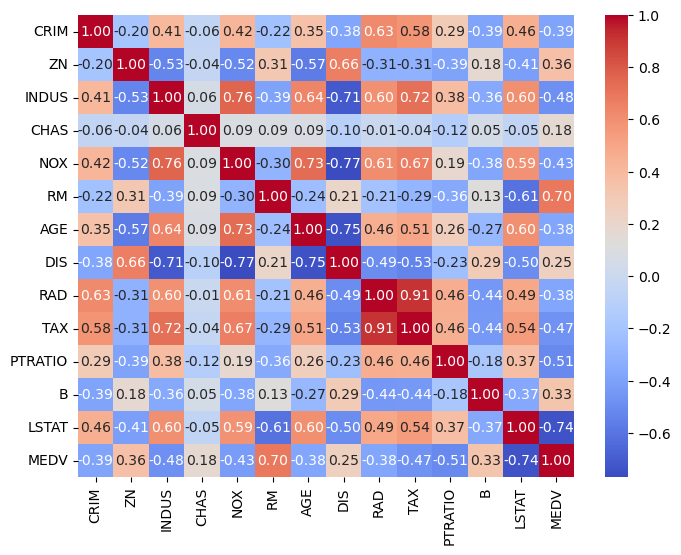

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')

Vemos que existe una correlación muy grande entre los impuestos y la accesibilidad de las viviendas a las grandes carreteras.

En cuanto al precio medio de la vivienda, que será nuestra variable target, vemos que existe una correlación moderada con el número medio de habitaciones y el de porcetanje de población de status bajo en la zona. Lo cual es lógico, más habitaciones supone mayor superficie y 'LSTAT' solo nos confirma la presencia de 'ghettos' en las grandes ciudades de los estados unidos.

Existe también correlación alta entre un conjunto de tres variables: 'INDUS', 'NOX' y 'DIS'. Las distancia a los centros de empleo, que son industria en su mayoria y a su vez los máximos responsables de la contaminación del aire.

## Exercici 1
**Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.**

Comenzamos por separar el dataset en train y test cogiendo como variable target el valor medio de la vivienda **'MEDV'**.


In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A continuación concateramos la 'X' y la 'y' del conjunto train y del test, con tal de poder estudiar los dos conjuntos por separado.

In [9]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

Comenzamos por comparar númericamente las diferentes estadísticas descriptivas de ambos conjuntos.

In [10]:
comparison_df = pd.DataFrame({
    'Train Mean': train.mean(),
    'Test Mean': test.mean(),
    'Train Median': train.median(),
    'Test Median': test.median(),
    'Train Variance': train.std(),
    'Test Variance': test.std(),
    'Train Count': train.count(),
    'Test Count': test.count()
})
comparison_df.round(3)

,Train Mean,Test Mean,Train Median,Test Median,Train Variance,Test Variance,Train Count,Test Count
CRIM,3.609,3.631,0.261,0.210,8.875,7.460,404,102
ZN,11.569,10.549,0.000,0.000,23.152,24.083,404,102
INDUS,10.985,11.738,8.560,10.590,6.895,6.723,404,102
CHAS,0.072,0.059,0.000,0.000,0.258,0.236,404,102
NOX,0.556,0.548,0.538,0.532,0.118,0.109,404,102
RM,6.316,6.161,6.210,6.171,0.709,0.664,404,102
AGE,68.556,68.648,77.700,74.700,27.995,28.891,404,102
DIS,3.808,3.743,3.176,3.353,2.131,2.011,404,102
RAD,9.356,10.314,5.000,5.000,8.590,9.162,404,102
TAX,404.032,424.892,330.000,345.000,166.173,177.462,404,102


A simple vista no parece que existan variaciones significativas entre ambos conjuntos. A continuación dibujaremos los correspondientes boxplots para observar visualmente si encontramos diferencias en la distribución de las variables de ambas muestras.

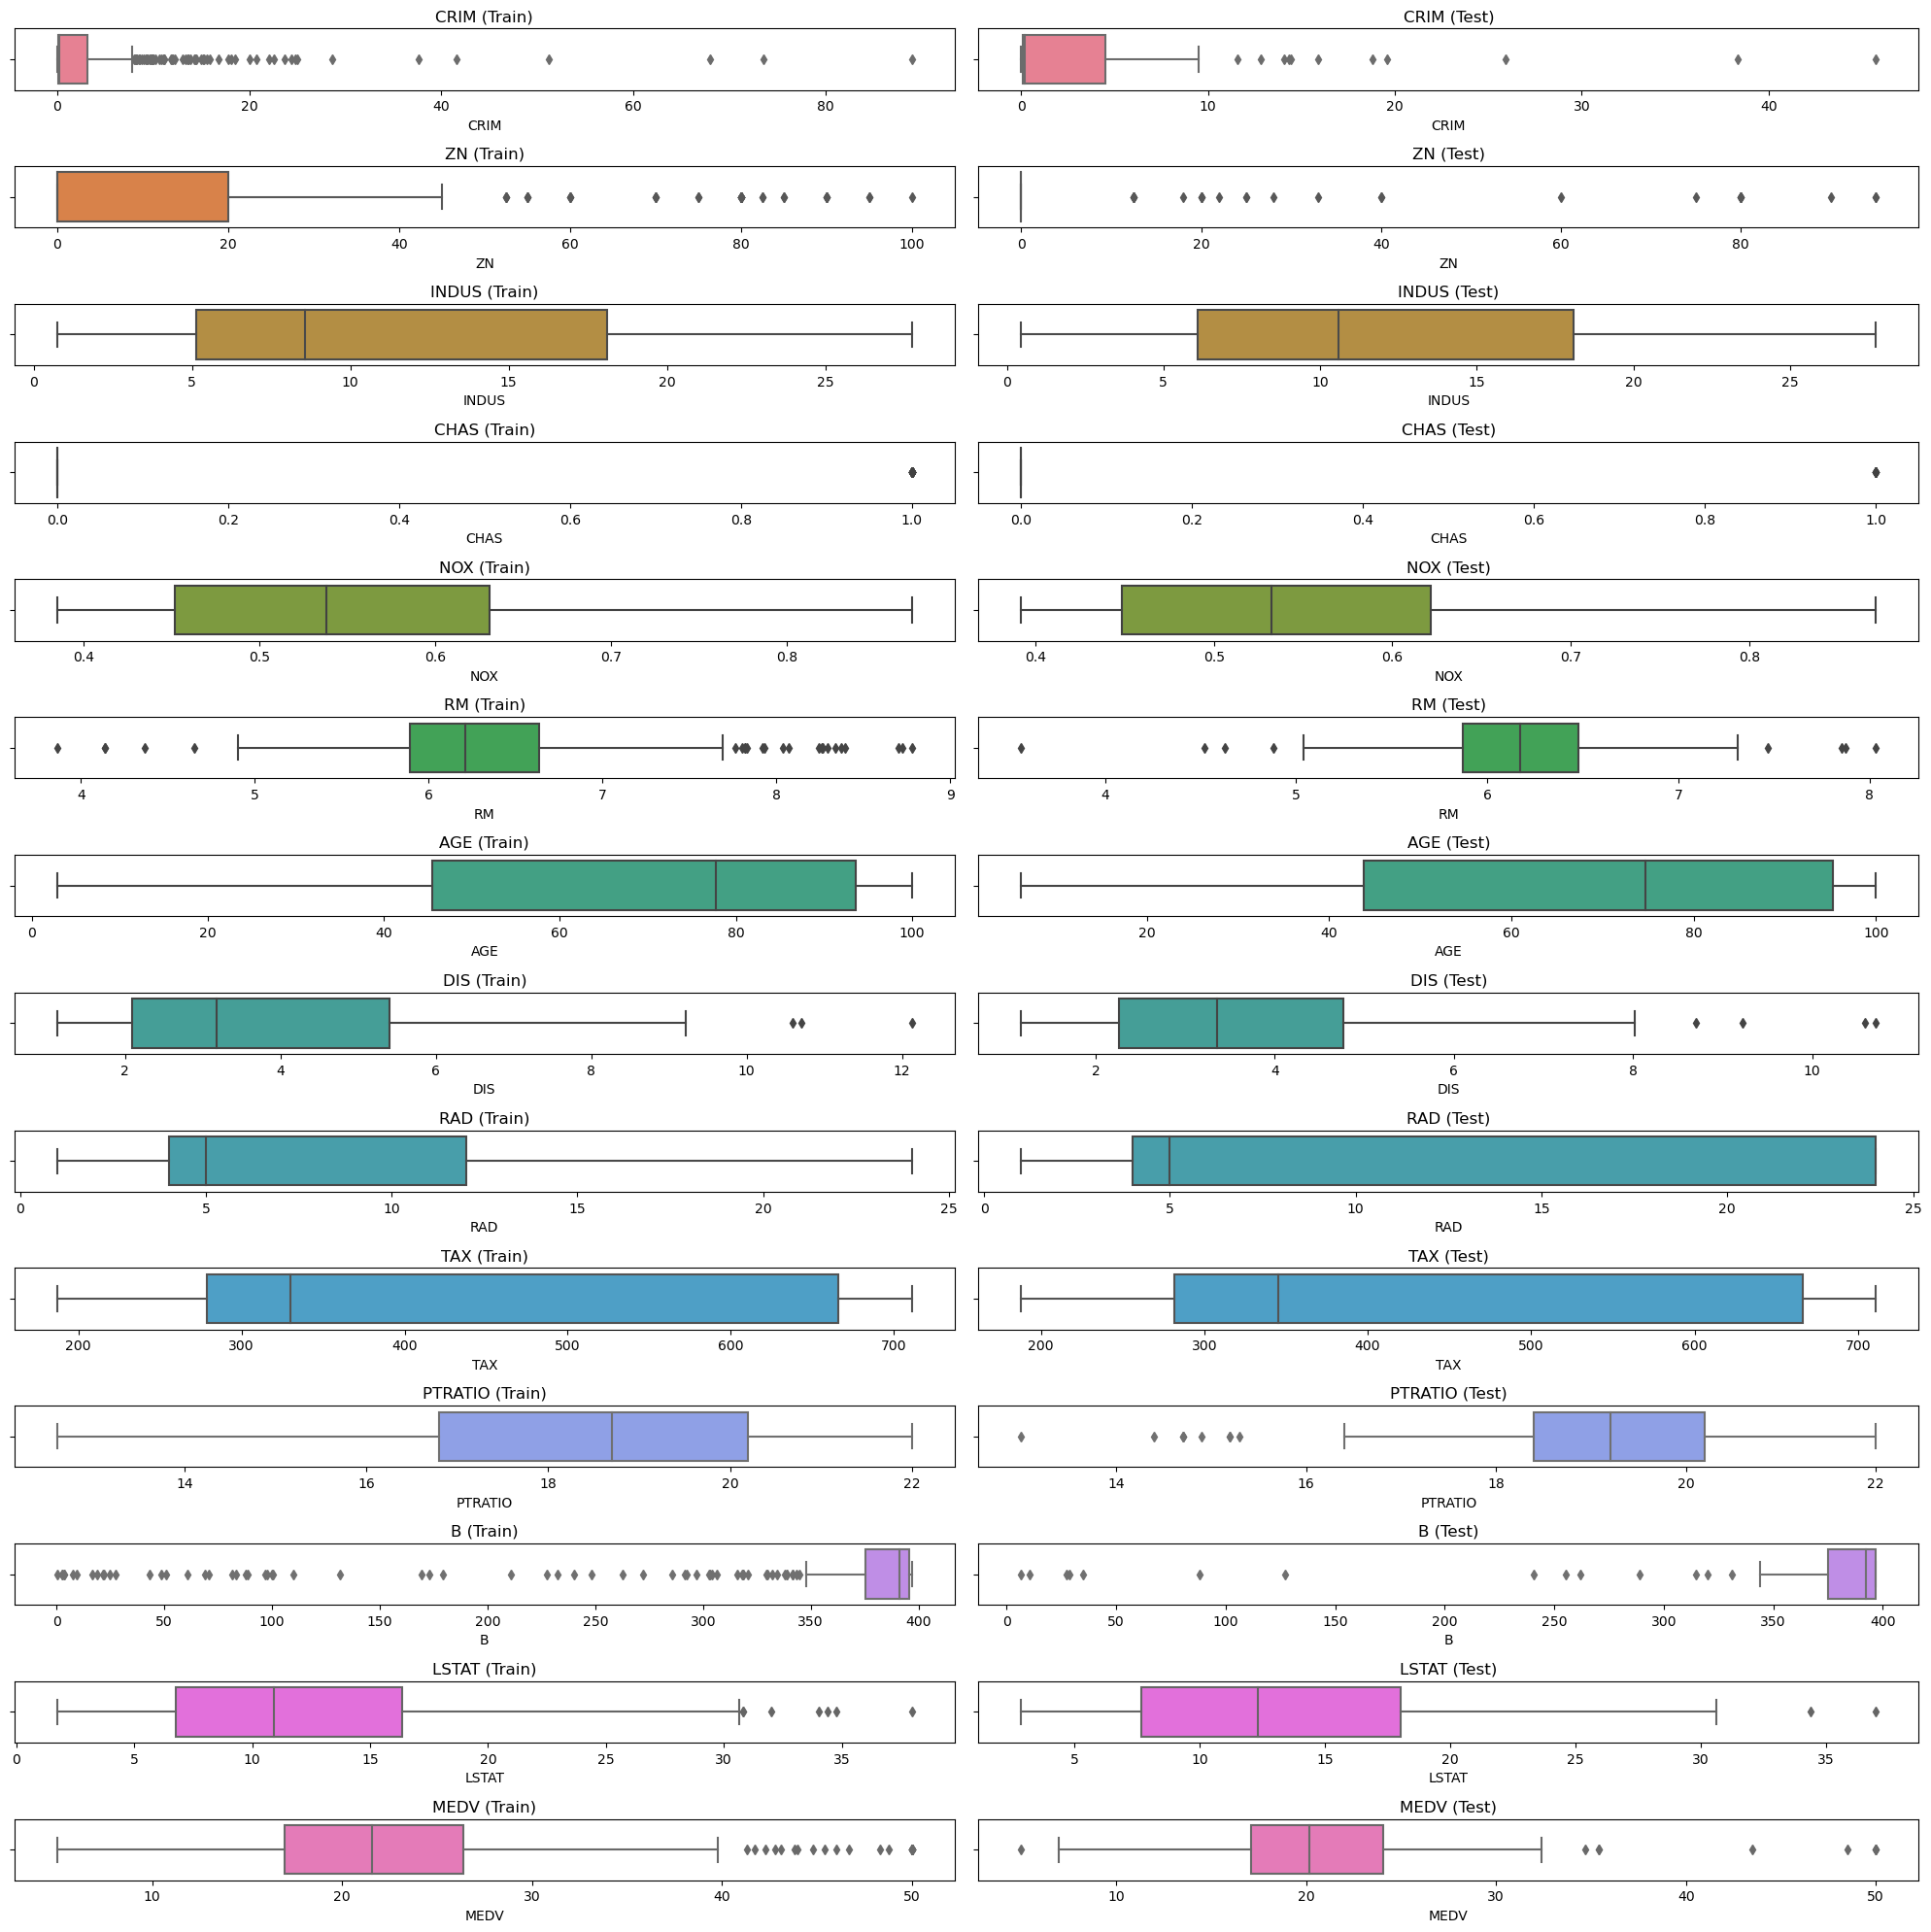

In [11]:
plt.figure(figsize=(20, 20))
palette = sns.color_palette("husl", n_colors=14)

for i, column in enumerate(train.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=train[column], orient="h",color=palette[i])
    plt.title(f'{column} (Train)')

    plt.subplot(14, 2, 2*i + 2)
    sns.boxplot(x=test[column], orient="h", color=palette[i])
    plt.title(f'{column} (Test)')

plt.tight_layout()

Aquí ya empezamos a ver algunas diferencias, como es el caso de 'CRIM', 'ZN' y 'RAD'. Ampliemos con los 'kdeplot' para obtener una visión mas completa de la distribución.

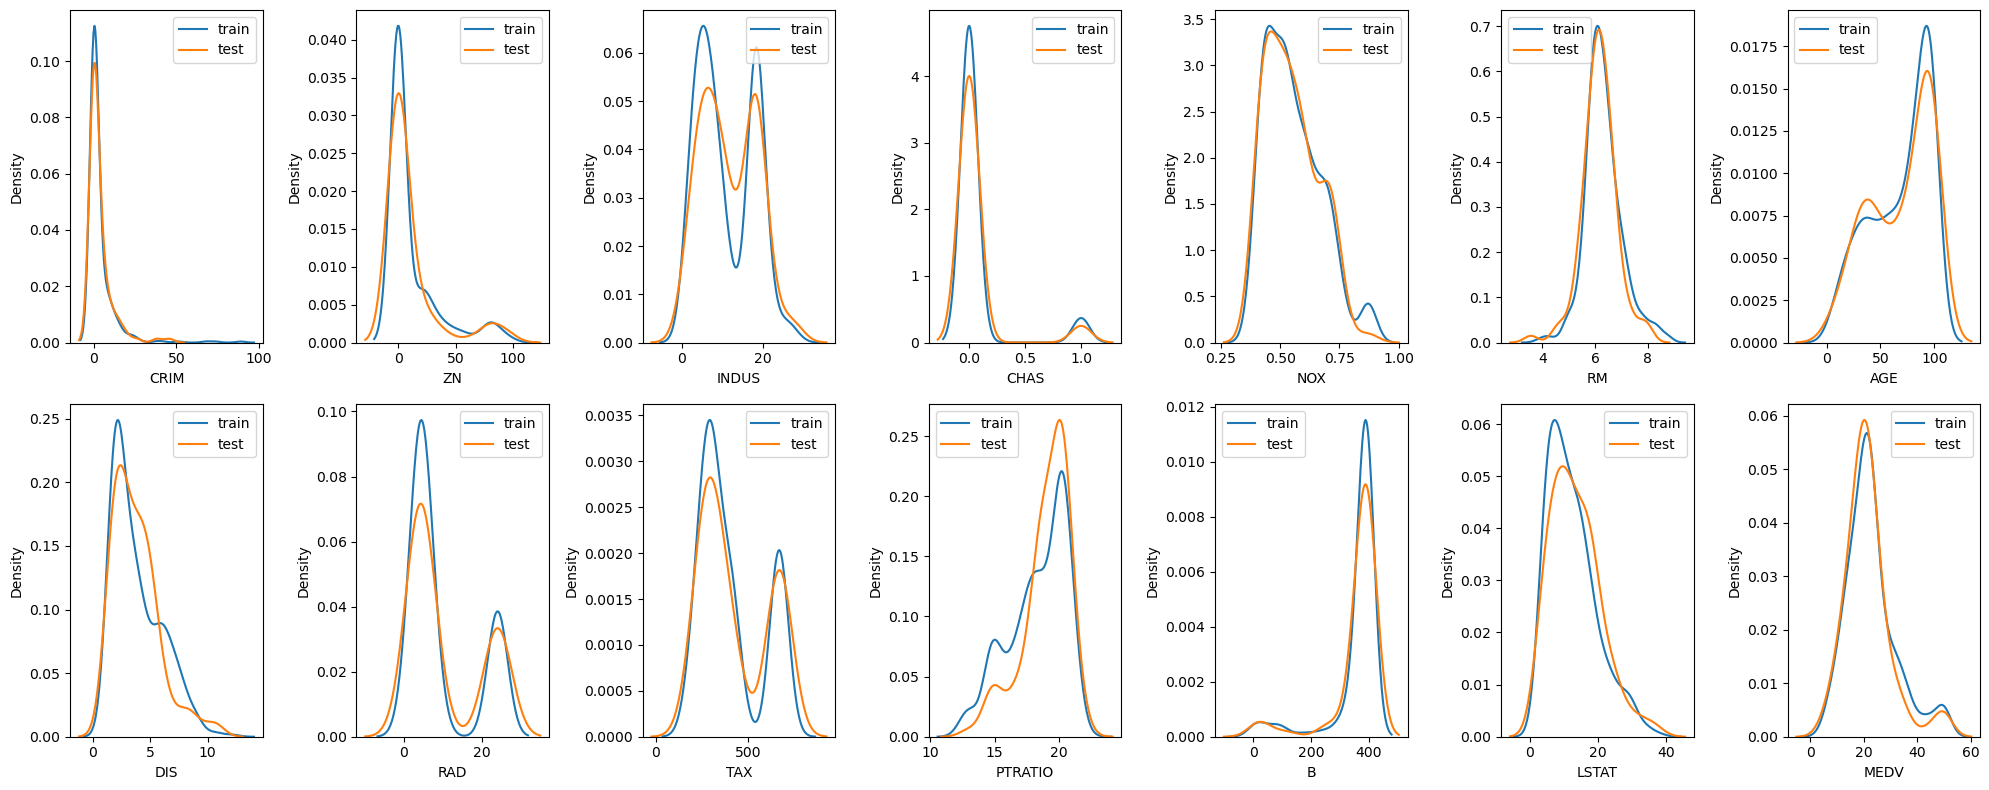

In [12]:
fig, axes = plt.subplots(2, 7, figsize=(20,8))

axes = axes.flatten()

for i, column in enumerate(train.columns):
    sns.kdeplot(x=train[column], ax=axes[i], label='train')
    sns.kdeplot(x=test[column], ax=axes[i], label='test')
    axes[i].legend()

plt.tight_layout()
plt.show()

Gracias a esta visión podemos ver que las curvas de densidades de probabilidad difieren poco unas de otras, quizas los picos no sean del mismo tamaño como es el caso claro de la variable 'INDUS' pero estan prácticamente en las mismas posiciones.

Pues ahora solo faltaría comprobar analíticamente que efectivamente no existen diferencias significativas entre los conjustos train y test. Para ello haremos uso de los test de hipotesis, para empezar miraremos si cada una de las variables tiene una distribución normal o no. Utilizaremos test de Shapiro-Wilk y planteamiento de la hipótesis sería:
- **Ho. Hipótesis Nula**: La variable sigue una distribución normal.
- **H1. Hipótesis Alternativa**: La variable no sigue una distribución normal.

In [13]:
from scipy import stats
from scipy.stats import shapiro

for data in train.columns:
    shapiro_test = stats.shapiro(train[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La muestra tiene probablemente una distribución normal.\n")
    else:
        print("La muestra no tiene probablemente una distribució normal.\n")

La variable CRIM te un P-value de 9.535140894485029e-34
La muestra no tiene probablemente una distribució normal.

La variable ZN te un P-value de 2.3739635036325265e-30
La muestra no tiene probablemente una distribució normal.

La variable INDUS te un P-value de 2.7679914397615423e-16
La muestra no tiene probablemente una distribució normal.

La variable CHAS te un P-value de 9.391968660033851e-37
La muestra no tiene probablemente una distribució normal.

La variable NOX te un P-value de 2.0199627560890665e-12
La muestra no tiene probablemente una distribució normal.

La variable RM te un P-value de 3.5270633080841662e-09
La muestra no tiene probablemente una distribució normal.

La variable AGE te un P-value de 4.1208994622913045e-16
La muestra no tiene probablemente una distribució normal.

La variable DIS te un P-value de 1.491983738567985e-15
La muestra no tiene probablemente una distribució normal.

La variable RAD te un P-value de 6.224426468774718e-27
La muestra no tiene probab


Observamos que, en todos los casos, rechazamos de manera concluyente la hipótesis nula (debido a 'p' extremadamente pequeñas), lo que implica que ninguna de las variables en el conjunto 'train' sigue una distribución normal. Es probable que nos enfrentemos a una situación similar en la muestra 'test'. Verifiquemos esto para confirmar.

In [14]:
for data in test.columns:
    shapiro_test = stats.shapiro(test[data])
    print("La variable", data, "te un P-value de", shapiro_test.pvalue)
    if shapiro_test.pvalue > 0.05:
        print("La muestra tiene probablemente una distribución normal.\n")
    else:
        print("La muestra no tiene probablemente una distribució normal.\n")

La variable CRIM te un P-value de 2.768859383834682e-16
La muestra no tiene probablemente una distribució normal.

La variable ZN te un P-value de 5.392444345409126e-17
La muestra no tiene probablemente una distribució normal.

La variable INDUS te un P-value de 1.734026773192454e-05
La muestra no tiene probablemente una distribució normal.

La variable CHAS te un P-value de 1.7643423192457963e-20
La muestra no tiene probablemente una distribució normal.

La variable NOX te un P-value de 0.00012224126840010285
La muestra no tiene probablemente una distribució normal.

La variable RM te un P-value de 0.0026262335013598204
La muestra no tiene probablemente una distribució normal.

La variable AGE te un P-value de 1.2417162054134678e-07
La muestra no tiene probablemente una distribució normal.

La variable DIS te un P-value de 3.707324367496767e-07
La muestra no tiene probablemente una distribució normal.

La variable RAD te un P-value de 9.729664854829165e-14
La muestra no tiene probable

Efectivamente nos encontramos en el mismo caso, pero esta vez algunos valores de 'p' como en la variable '', se han quedado un poco mas cerca. Concluimos pues que ninguna variable sigue una distribución normal. Por lo tanto que nos limita el abanico de test que podremos utilizar a pruebas no paramétricas para asegurar que no existen diferencias significativas entre ambos conjuntos. El test elegido es el de U de Mann-Whitney donde la **Ho. Hipótesis nula** sugiere que las posiciones relativas de los valores en ambas muestras son igualmente probables, es decir, que se distribuyen de manera idéntica. y por lo tanto **H1. Hipótesis alternativa** concluye que las dos muestras no se distribuyen de forma idéntica.

In [15]:
from scipy.stats import mannwhitneyu

for variable in train.columns:
    statistic, p_value = mannwhitneyu(train[variable], test[variable])
    
    print(f"Variable: {variable}")
    print(f"Estadístico U: {statistic}")
    print(f"P-value: {p_value}")
    
    if p_value < 0.05:
        print("\033[91mDiferencias significativas entre 'train' y 'test'\033[0m.\n".format(p_value))
    else:
        print("No hay diferencias significativas entre 'train' y 'test'.\n")


Variable: CRIM
Estadístico U: 20828.5
P-value: 0.8651962581328241
No hay diferencias significativas entre 'train' y 'test'.

Variable: ZN
Estadístico U: 21404.5
P-value: 0.43474958647920414
No hay diferencias significativas entre 'train' y 'test'.

Variable: INDUS
Estadístico U: 19348.0
P-value: 0.3369051705332545
No hay diferencias significativas entre 'train' y 'test'.

Variable: CHAS
Estadístico U: 20871.0
P-value: 0.6458355452992421
No hay diferencias significativas entre 'train' y 'test'.

Variable: NOX
Estadístico U: 21175.5
P-value: 0.6651278180222092
No hay diferencias significativas entre 'train' y 'test'.

Variable: RM
Estadístico U: 22685.5
P-value: 0.11476462452621221
No hay diferencias significativas entre 'train' y 'test'.

Variable: AGE
Estadístico U: 20173.5
P-value: 0.7444347291239399
No hay diferencias significativas entre 'train' y 'test'.

Variable: DIS
Estadístico U: 20528.0
P-value: 0.9543702989405957
No hay diferencias significativas entre 'train' y 'test'.

Vari


Efectivamente, la función **train_test_split** demuestra ser altamente efectiva, ya que no se observan diferencias significativas en la mayoría de las variables. Sin embargo, de manera sorprendente, en este caso particular, se identifica una variable, **'PTRATIO'**, donde la prueba indica evidencia estadística que respalda la presencia de diferencias significativas entre las muestras de los conjuntos 'train' y 'test'. Es posible que este hallazgo se deba a que el conjunto de datos no es lo suficientemente extenso para abordar la considerable variabilidad presente en esa variable específica.

Una vez identificado este resultado, es valioso retroceder y revisar el kdeplot de esta variable en particular. Al hacerlo, se confirma que las curvas muestran diferencias apreciables que, en un primer momento, pasaron desapercibidas. Este análisis más detallado subraya la importancia de examinar de cerca las variables individualmente, incluso cuando el conjunto de datos en su conjunto parece comportarse de manera homogénea.

## Exercici 2
**Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).**

Desde este punto en adelante, asumiremos que estamos preparando los datos para entrenar un modelo, por lo que continuaremos trabajando con **X_train** y una vez decidido las diferentes transformaciones de cada variable, a posteriori, hariamos las mismas en las del conjunto **X_test** con tal de garantizar que el modelo entrenado en el conjunto de entrenamiento pueda generalizarse correctamente al conjunto de prueba. Es importante destacar que la variable dependiente (**y_train**), especialmente en casos donde se planea realizar una regresión o clasificación posterior, no será sometida a ningún método de transformación por el momento.

El primer paso será fijarnos en el tipo de variables.

In [16]:
X_train.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

Ya vemos que algo pasa con las variables 'CHAS' y 'RAD', el resto son 'float' y estas son 'int'. Vamos a mirar que valores toman.

In [17]:
X_train['CHAS'].value_counts()

0    375
1     29
Name: CHAS, dtype: int64

La variable 'CHAS' únicamente presenta los valores '0' y '1', lo que la clasifica como una variable binaria. Pasaremos su tipo a 'categórica' y comprobamos que el cambio ha tenido efecto.

Antes de comenzar, crearemos una copia del conjunto de datos, la cual emplearemos para aplicar las transformaciones correspondientes a las variables.

In [18]:
X_train_trans = X_train.copy()
X_train_trans['CHAS'] = X_train_trans['CHAS'].astype('category')
X_train_trans.dtypes

CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD           int64
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object

In [19]:
X_train['RAD'].value_counts()

24    101
5      94
4      80
3      32
6      23
2      21
8      21
1      17
7      15
Name: RAD, dtype: int64

Observamos que 'RAD' tiene un número limitado de registros y, al tratarse de un índice, podemos considerarla como una variable categórica jerarquizada.

Una vez establecidas las variables categóricas comenzaremos con la transformación. La variable 'CHAS' es binaria y la dejaremos sin cambios, ya que convertirla en una dummy solo duplicaría la misma información. Por otro lado, en el caso de 'RAD', podríamos contemplar la creación de dummies; no obstante, al tener una jerarquía, la conversión directa a dummies podría resultar en la pérdida de información sobre el orden relativo. Dado que este es un ejercicio de repaso y no hay una opción mejor, crearemos dummies para esta variable con el fin de practicar. Sin embargo, para evitar que el tamaño del dataframe aumente considerablemente, optaremos por establecer tres categorías: 'bajo', 'medio' y 'alto'. Posteriormente, generaremos las dummies, limitándonos a tres en lugar de las nueve que tendríamos de forma directa.

In [20]:
def categorizar(valor):
    if valor < 5:
        return 'cerca'
    elif valor < 10:
        return 'medio'
    else:
        return 'lejos'

X_train_trans['CAR'] = X_train['RAD'].apply(categorizar)
X_train_trans = pd.concat([X_train_trans, pd.get_dummies(X_train_trans['CAR'], prefix='CAR')], axis=1).drop(columns=['RAD', 'CAR'])
X_train_trans

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CAR_cerca,CAR_lejos,CAR_medio
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,666.0,20.2,349.48,24.91,0,1,0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,307.0,21.0,395.62,8.47,1,0,0
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,304.0,16.9,362.25,7.83,1,0,0
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,666.0,20.2,2.52,23.29,0,1,0
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,307.0,21.0,390.95,11.28,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,384.0,20.9,395.67,18.66,0,0,1
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,223.0,18.6,388.65,13.00,1,0,0
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,280.0,17.0,390.94,5.99,1,0,0
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,666.0,20.2,109.85,23.27,0,1,0


In [21]:
X_train_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       404 non-null    float64 
 1   ZN         404 non-null    float64 
 2   INDUS      404 non-null    float64 
 3   CHAS       404 non-null    category
 4   NOX        404 non-null    float64 
 5   RM         404 non-null    float64 
 6   AGE        404 non-null    float64 
 7   DIS        404 non-null    float64 
 8   TAX        404 non-null    float64 
 9   PTRATIO    404 non-null    float64 
 10  B          404 non-null    float64 
 11  LSTAT      404 non-null    float64 
 12  CAR_cerca  404 non-null    uint8   
 13  CAR_lejos  404 non-null    uint8   
 14  CAR_medio  404 non-null    uint8   
dtypes: category(1), float64(11), uint8(3)
memory usage: 39.6 KB


Ahora es el momento de realizar transformaciones en las variables numéricas. Las opciones más comunes son las siguientes:

- **Estandarización-z**: Se utiliza principalmente en distribuciones cercanas a la normalidad.
- **Min-Max**: Se prefiere en distribuciones desconocidas o que no siguen una distribución normal, y cuando no hay presencia de valores extremos.
- **RobustScaler**: Es útil en casos de distribuciones no normales y presencia de outliers.

En el ejercicio anterior, observamos que ninguna variable seguía una distribución normal. Utilizaremos los boxplots para evaluar la presencia de outliers, y basándonos en esta información, aplicaremos la normalización Min-Max a las variables 'INDUS', 'NOX', 'AGE' y 'TAX', ya que no presentaban outliers. Para las variables 'CRIM', 'ZN', 'RM', 'DIS', 'B' y 'LSTAT', que contienen muchos outliers, optaremos por la normalización RobustScaler. La situación de la variable 'PTRATIO' es peculiar: aunque en el conjunto 'train' no hay outliers, en el conjunto 'test' sí. Por precaución, aplicaremos RobustScaler a ambas para considerar los outliers del conjunto 'test'. Es importante mantener consistencia en las transformaciones entre las variables de ambos conjuntos.

In [22]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

variables_minmax = ['INDUS', 'NOX', 'AGE', 'TAX']
minmax_scaler = MinMaxScaler()
X_train_trans[variables_minmax] = minmax_scaler.fit_transform(X_train_trans[variables_minmax])

variables_robust = ['CRIM', 'ZN', 'RM', 'DIS', 'B', 'LSTAT', 'PTRATIO']
robust_scaler = RobustScaler()
X_train_trans[variables_robust] = robust_scaler.fit_transform(X_train_trans[variables_robust])

X_train_trans

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,CAR_cerca,CAR_lejos,CAR_medio
477,4.729102,0.00,0.642963,0,0.471193,-1.214070,0.972194,-0.324502,0.914122,0.441176,-2.062123,1.456771,0,1,0
15,0.117250,0.00,0.274074,0,0.314815,-0.503853,0.552008,0.399300,0.229008,0.676471,0.212745,-0.255729,1,0,0
332,-0.072634,1.75,0.197037,0,0.108848,-0.239866,0.210093,1.045888,0.223282,-0.529412,-1.432516,-0.322396,1,0,0
423,2.174908,0.00,0.642963,0,0.471193,-0.143384,0.846550,-0.348318,0.914122,0.441176,-19.168495,1.288021,0,1,0
19,0.148777,0.00,0.274074,0,0.314815,-0.647236,0.685891,0.187372,0.229008,0.676471,-0.017503,0.036979,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,-0.028893,0.00,0.289630,0,0.277778,-0.501173,0.916581,-0.291208,0.375954,0.647059,0.215210,0.805729,0,0,1
270,0.012100,1.00,0.230370,0,0.162551,-0.474372,0.403708,0.378291,0.068702,-0.029412,-0.130901,0.216146,1,0,0
348,-0.078929,4.00,0.047037,0,0.102881,0.569514,0.276004,1.560026,0.177481,-0.500000,-0.017996,-0.514062,1,0,0
435,3.491566,0.00,0.642963,0,0.730453,0.561474,0.944387,-0.317257,0.914122,0.441176,-13.876741,1.285937,0,1,0


En este punto, hemos completado todas las transformaciones necesarias en las variables del conjunto 'X_train'. Es importante destacar que, en el siguiente paso, aplicaremos las mismas transformaciones a las variables del conjunto 'X_test'. Esta práctica garantiza que nuestro modelo pueda ser evaluado de manera coherente y justa, manteniendo la consistencia del modelo, permitiendo su generalización a datos no vistos, asegurando la compatibilidad de características y evitando fugas de información.

## Exercici 3
**Resumeix les noves columnes generades de manera estadística i gràfica**

En esta sección, encuentro pertinente realizar comparaciones tanto gráficas como estadísticas entre las columnas del conjunto de entrenamiento antes de las transformaciones y el conjunto transformado con todas las modificaciones aplicadas a las variables. Comenzaremos por las estadísticas.

In [23]:
combined_data = pd.concat([X_train, X_train_trans], keys=['Original', 'Transform'])

for column in combined_data.columns:
    variable_describe = combined_data[column].groupby(level=0).describe().round(3)
    print(f"\nEstadísticas descriptivas para la variable '{column}':")
    print(variable_describe)


Estadísticas descriptivas para la variable 'CRIM':
           count   mean    std    min    25%    50%    75%     max
Original   404.0  3.609  8.875  0.009  0.081  0.261  3.203  88.976
Transform  404.0  1.072  2.843 -0.081 -0.058 -0.000  0.942  28.420

Estadísticas descriptivas para la variable 'ZN':
           count    mean     std  min  25%  50%   75%    max
Original   404.0  11.569  23.152  0.0  0.0  0.0  20.0  100.0
Transform  404.0   0.578   1.158  0.0  0.0  0.0   1.0    5.0

Estadísticas descriptivas para la variable 'INDUS':
           count    mean    std   min    25%   50%     75%    max
Original   404.0  10.985  6.895  0.74  5.130  8.56  18.100  27.74
Transform  404.0   0.379  0.255  0.00  0.163  0.29   0.643   1.00

Estadísticas descriptivas para la variable 'CHAS':
           count   mean    std  min  25%  50%  75%  max
Original   404.0  0.072  0.258  0.0  0.0  0.0  0.0  1.0
Transform  404.0  0.072  0.258  0.0  0.0  0.0  0.0  1.0

Estadísticas descriptivas para la variable

De este resumen, lo primero que llama la atención es que la variable 'RAD' no está presente en el conjunto de datos transformado, al igual que 'RIO_CERCA', 'RIO_MEDIO' y 'RIO_LEJOS', que no existían en el 'X_train' original. Naturalmente, la columna 'CHAS' no ha experimentado cambios y, en general, la desviación estándar ha disminuido en casi todas partes, situándose por debajo de 1 y los valores de la mayoría de las variables ahora oscilan entre -1 y 1, salvo en el caso de aquellas con numerosos ouliers, donde los límites pueden ser algo mayores.

Para concluir intentaremos ver las diferencias entre las distribuciones de ambos conjuntos gráficamente, con tal de obtener algo mas luz.

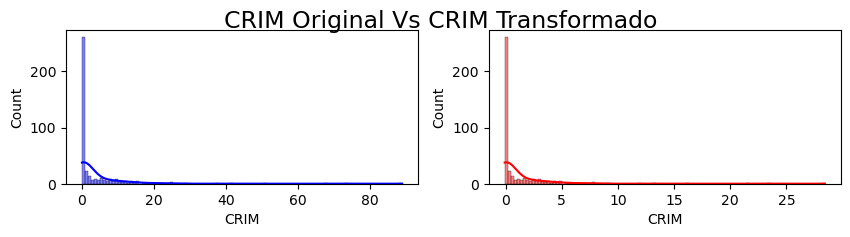

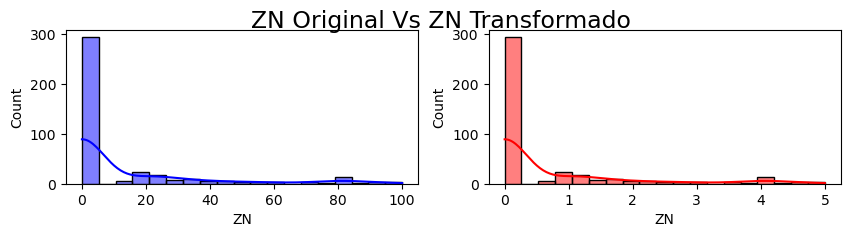

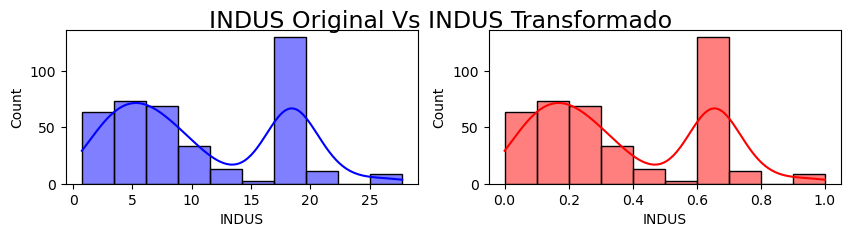

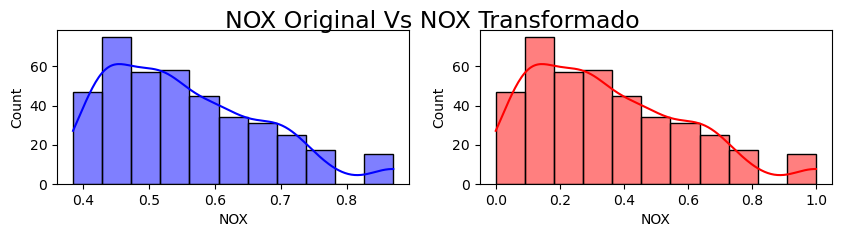

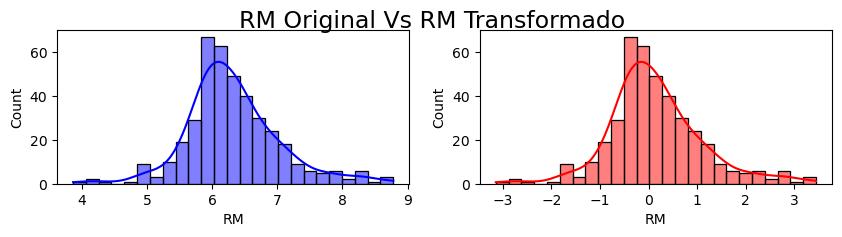

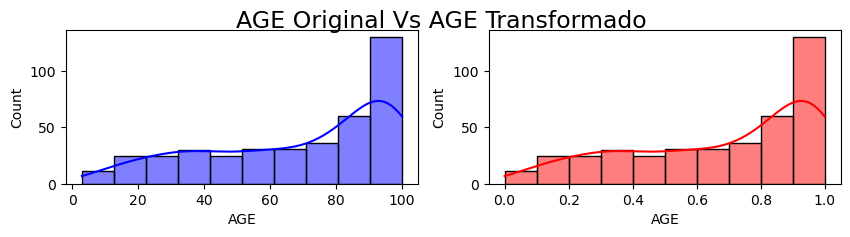

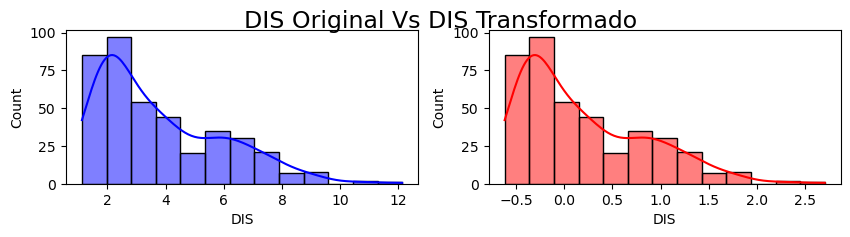

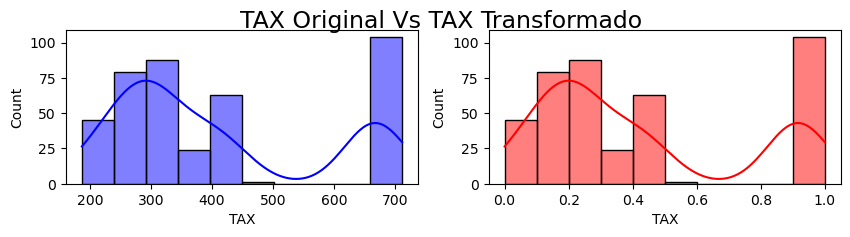

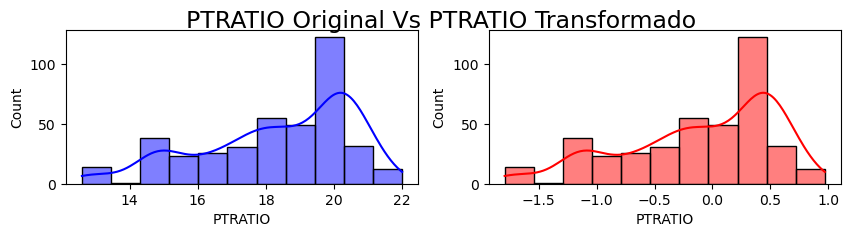

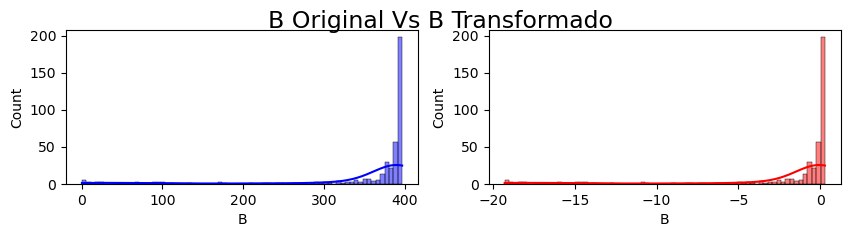

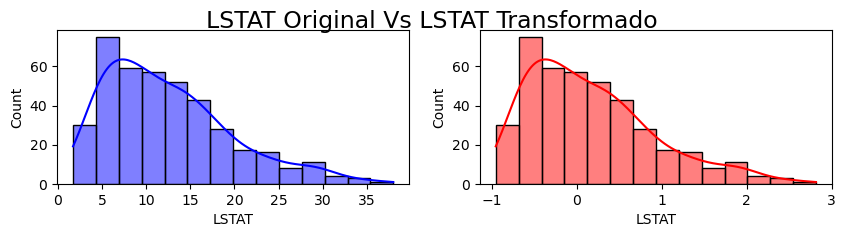

In [24]:
columns = X_train.drop(['RAD', 'CHAS'], axis=1)
for column in columns:
        fig, axes = plt.subplots(1,2, figsize = (10, 2))
        fig.suptitle(f'{column} Original Vs {column} Transformado', fontsize=17)
        sns.histplot(ax=axes[0], data=X_train, x=X_train[column], kde=True, color='blue')
        sns.histplot(ax=axes[1], data=X_train_trans, x=X_train_trans[column], kde=True, color='red')

Observamos que no hay ninguna diferencia en la distribución de los valores dentro de cada variable; la única variación se encuentra en el rango en el que se sitúan los valores, como se evidencia al observar los valores en el eje 'x' de las gráficas.

Concluimos, por lo tanto, que la estandarización de los datos no altera la distribución de los valores, sino que simplemente los coloca dentro de un rango similar (aproximadamente entre -1 y 1). Esto se realiza para que todas las variables tengan un peso uniforme al buscar un modelo, facilitando así la comparación y la toma de decisiones en el proceso de modelado.